<hr>

# 模拟世界的财富分配
房间内有 100 人，每人有 100 块，每分钟随机给另一个人 1 块钱，最后这个房间内的财富分布怎样？

https://www.zhihu.com/question/62250384/answer/201726206

建议各位先想想，你认为在完全随机的情况下，最终的分配情况是怎样的？

我们不妨把这场游戏视作在遥远的**埃拉博星球上社会财富分配的简化模型**，从而模拟这个世界的运行规律。我们假设：
* 每个人在18岁带着100元的初始资金开始玩游戏，
* 每天玩一次，一直玩到80岁的人均寿命。
* “每天拿出一元钱”可理解为基本的日常消费，“获得财富的概率也是完全随机”

依次简化模型进行模拟。看起来一般人平均寿命80岁，一生要玩`20000`次游戏，即获得`20000`次财富分配的机会。

<hr>

#### 首先看看不允许负债的情况下，参与者的财富分配情况

In [2]:
#
#  初始化模拟世界
#
from random import choice, sample

nLoops = 20000  # 分配的次数
nGamers = 100   # 参与分配的人数
deposit = 100   # 每个人初始财富数量
consume = 1        # 每次分配消费或者获得的财富

gamers = {}     # 用字典的方式保存每个人的财富数量并初始化
for gamer in range(nGamers):
    gamers[gamer] = deposit

In [3]:
# 注意choice/sample的使用方式
help(choice)
help(sample)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:

In [4]:
import numpy as np
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry i

In [5]:
# 计算每一次随机分配后的个人财富
def epoch(gamers, nGamers, consume, loan=False):
    """
    模拟每次分配的情况
       1 遍历全体参与者，获得参与者ID和拥有的财富
       2 随机挑选除自己以外的一个参与者
       3 自己消费财富同时挑选的参与者获得相应财富（注：考虑负债）
       
    参数：
        gamers - 分配游戏的参与者和其携带的财富数量；数据类型：字典，其中key为参与者ID，value为对应的财富数量
        nGamers - 参与分配游戏的总人数；数据类型：大于1的正整数
        consume - 参与每次分配消费或者获得的财富；数据类型：正整数
        loan - 当参与者携带的财富小于零的时候，是否允许参与本次分配的消费活动
    """

    for nid, nvalue in gamers.items():
        others = list(range(0,nGamers))
        del(others[nid])
        to_gamer = choice(others)
        if gamers[nid] <= 0 and not loan:
            continue
        gamers[to_gamer] += consume
        gamers[nid] -= consume
    
    return gamers

In [6]:
# 模拟分配 - 不负债的情况
for i in range(nLoops):
    gamers = epoch(gamers, nGamers, consume)
print(gamers)

{0: 183, 1: 229, 2: 16, 3: 63, 4: 80, 5: 8, 6: 73, 7: 57, 8: 4, 9: 55, 10: 121, 11: 88, 12: 246, 13: 36, 14: 74, 15: 171, 16: 156, 17: 82, 18: 79, 19: 16, 20: 33, 21: 42, 22: 42, 23: 68, 24: 52, 25: 42, 26: 18, 27: 4, 28: 62, 29: 65, 30: 322, 31: 166, 32: 207, 33: 98, 34: 152, 35: 58, 36: 125, 37: 145, 38: 141, 39: 185, 40: 146, 41: 2, 42: 219, 43: 35, 44: 287, 45: 13, 46: 36, 47: 213, 48: 17, 49: 138, 50: 176, 51: 3, 52: 79, 53: 39, 54: 98, 55: 116, 56: 25, 57: 288, 58: 86, 59: 20, 60: 152, 61: 286, 62: 49, 63: 12, 64: 9, 65: 89, 66: 98, 67: 17, 68: 11, 69: 132, 70: 39, 71: 81, 72: 91, 73: 44, 74: 220, 75: 245, 76: 299, 77: 166, 78: 88, 79: 207, 80: 23, 81: 186, 82: 12, 83: 20, 84: 91, 85: 71, 86: 193, 87: 223, 88: 3, 89: 65, 90: 33, 91: 23, 92: 298, 93: 16, 94: 57, 95: 64, 96: 97, 97: 122, 98: 112, 99: 56}


In [7]:
def vis_simulation(nGamers, gamers, lucky_gamers=None):
    """
    模拟世界的财富分配 - 可视化结果
    
    参数：
        nGamers - 参与分配游戏的总人数；数据类型：大于1的正整数
        gamers - 分配游戏的参与者和其携带的财富数量；数据类型：字典，其中key为参与者ID，value为对应的财富数量
    """
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

    if lucky_gamers:
        new_gamers = []
        for i in lucky_gamers:
            new_gamers.append(gamers[i])

        sort_gamers = sorted(gamers.values())
        new_index = []
        for i in new_gamers:
            index = sort_gamers.index(i)
            new_index.append(index)
    
    
    # 可视化结果
    plt.figure(figsize=(18,6))
    plt.subplot(131)
    plt.hist(gamers.values())
    #plt.xlim([0,400])
    #plt.ylim([0,30])
    plt.title("财富的总体分布")

    plt.subplot(132)
    plt.bar(range(0,nGamers), gamers.values(), width=0.5, color='orange')
    if lucky_gamers:
        plt.bar(lucky_gamers, new_gamers, width=0.5, color='red')
    plt.plot([0,100],[100, 100],color='green',linestyle="-.",linewidth=1)
    plt.xlim([0,100])
    #plt.ylim([0,400])
    plt.title("个人持有财富的分布")
    
    plt.subplot(133)
    plt.bar(range(0,nGamers), sorted(gamers.values()), width=0.5, color='orange')
    if lucky_gamers:
        plt.bar(new_index, new_gamers, width=0.5, color='red')
    plt.plot([0,100],[100, 100],color='green',linestyle="-.",linewidth=1)
    plt.xlim([0,100])
    #plt.ylim([0,400])
    plt.title("排序后的个人持有财富分布")
    plt.show()

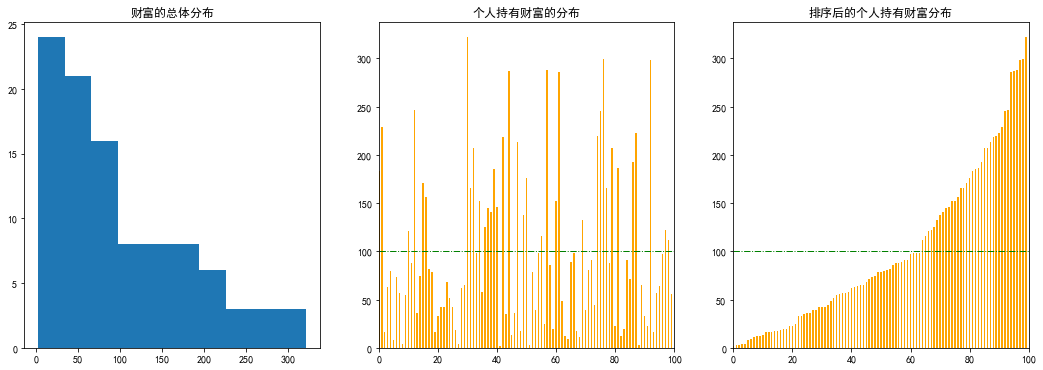

In [8]:
vis_simulation(nGamers, gamers)

#### 让我们好好静一静面对这个财富分配的结果... 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 然后看看`允许负债`的情况下，参与者的财富分配情况

是不是社会财富分配就更加合理呢？

In [9]:
gamers = {}     # 用字典的方式保存每个人的财富数量并初始化
for gamer in range(nGamers):
    gamers[gamer] = deposit

# 模拟分配 - 允许负债的情况
for i in range(nLoops):
    gamers = epoch(gamers, nGamers, consume, loan=True)

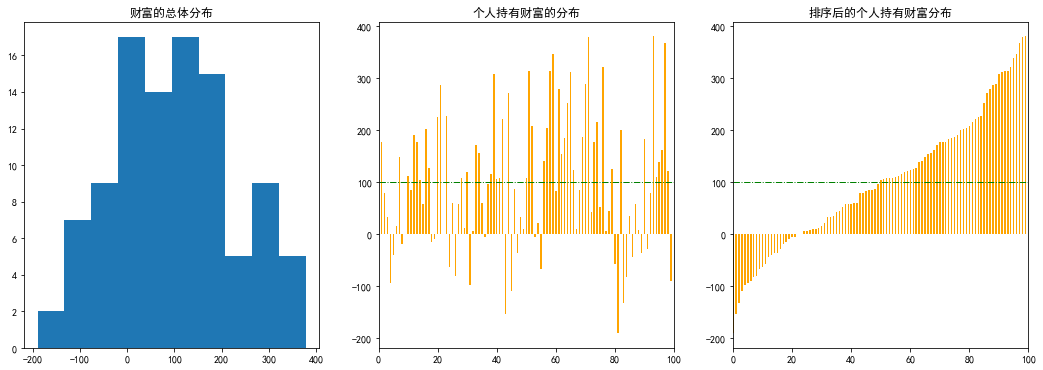

In [10]:
vis_simulation(nGamers, gamers)

#### 其次，看看`允许负债`而且某些参与者更加`积极/努力`的情况下，参与者的财富分配情况

也就是我们假设某些参与者通过努力奋斗，因此每天都能够比其他人多1%的机会(也就是总体的1.01%）来获得财富。
<br>
<br>
<br>
<br>
考验灵魂的一问？？？？
<br>
<br>
<br>
<br>
- 是不是积极努力的人们**可以**获得更好的回报呢？

- 是不是积极努力的人们**真的可以**获得更好的回报呢？

- 是不是积极努力的人们**真的真的可以**获得更好的回报呢？


### 需要思考一下，如果在模拟中提高这些奋斗者获得财富的几率呢？

In [12]:
# 假如有某些比较努力的人们，计算每一次随机分配后的个人财富
def epoch_better_person(gamers, nGamers, consume, lucky_gamers, loan=False):
    """对于给定人数的游戏参与者， 每个人都随机的给其他人指定数量的货币（give）
       其中loan参数显示是否允许参与分配的人其财富为负值（即负债）
    """
    
    pass

In [13]:
gamers = {}     # 用字典的方式保存每个人的财富数量并初始化
for gamer in range(nGamers):
    gamers[gamer] = deposit

# 模拟分配 - 允许负债的情况 & 存在10个积极努力的参与者（奋斗者）
lucky_gamers = sample(range(0, nGamers), 10)
for i in range(nLoops):
    gamers = epoch_better_person(gamers, nGamers, consume, lucky_gamers, loan=True)

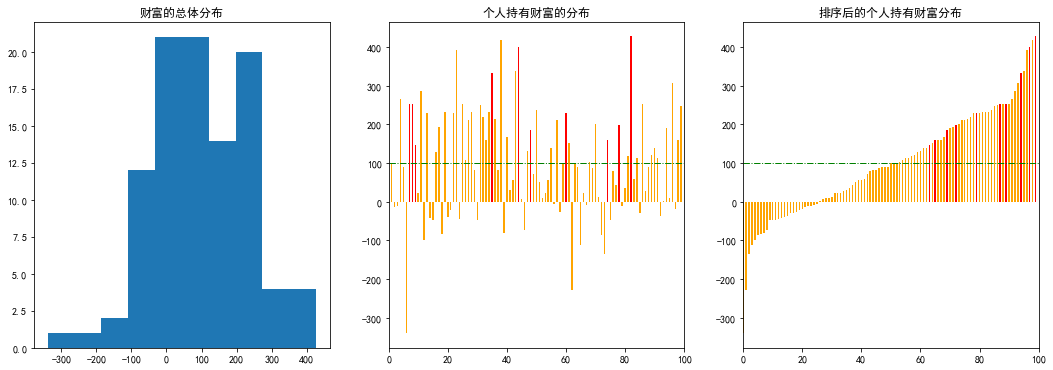

In [52]:
vis_simulation(nGamers, gamers, lucky_gamers=lucky_gamers)

#### 让我们再次安静下来，面对这个财富分配的结果... 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

最后嘞，也许展示一个动画效果可能更加清晰, 链接如下

https://pic1.zhimg.com/v2-cd7228494dd4f0174f60ee965a087b14_b.gif

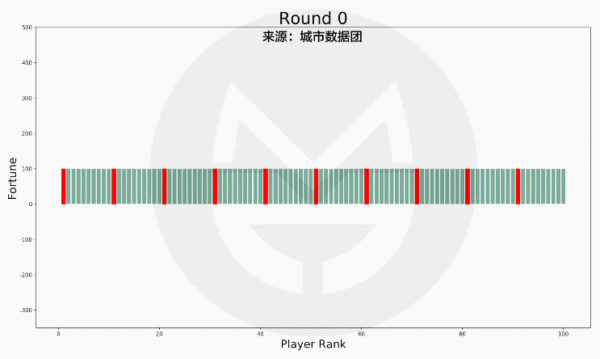

<hr>

**总结** Python丰富的函数库提供了非常强大的功能，足以让我们去模拟这个`世界`。

上面这个随机数的案例不能完全代表现实世界的情况；比如我们模拟的是个零和游戏，而且没有技术突破或者经济增长让每个人有益（也就是总财富增加）。但是，上述模拟也足以展示了这个世界的一些线索：

* 是的，尽管最成功的玩家不一定是最努力的那个，
* 但是努力的人大都（80%）混的还不错。感谢这个残酷世界还给我们留下一条生路。

那么，该如何面对这个残酷的世界？

那就是

* **努力 -- 奋斗**
* **并坚持下去**

<hr>

<br>
<br>
<br>

**考虑`技术进步`对财富分配的影响**

思路：假设参与者有不同学历的分布情况；比如研究生以上学历占到1%，本科生学历占到8%，专科学历占到8%，剩下是高中及以下学历。然后我们假设由于参与者学历的不同，每一轮会以不同的几率获得一定的额外财富；比如，研究生学历的平均工资要超过本科生学历的平均工资。而由于整个社会的技术进步，这种工资不同带来的额外收入在模拟中体现为高学历者有更大的几率获得更多收入。或者说，技术进步带来的普惠效果对于高学历人群来说可能更加明显！

<br>
<br>
<br>

**最后的最后，欢迎大家思考这样一个问题：如何能让财富分配变得不那么差距明显？也就是如何实现一个收入趋于更加平等的财富分配模型？**